# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [1]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [4]:
df=pd.read_csv("BankNote_Authentication.csv")

In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


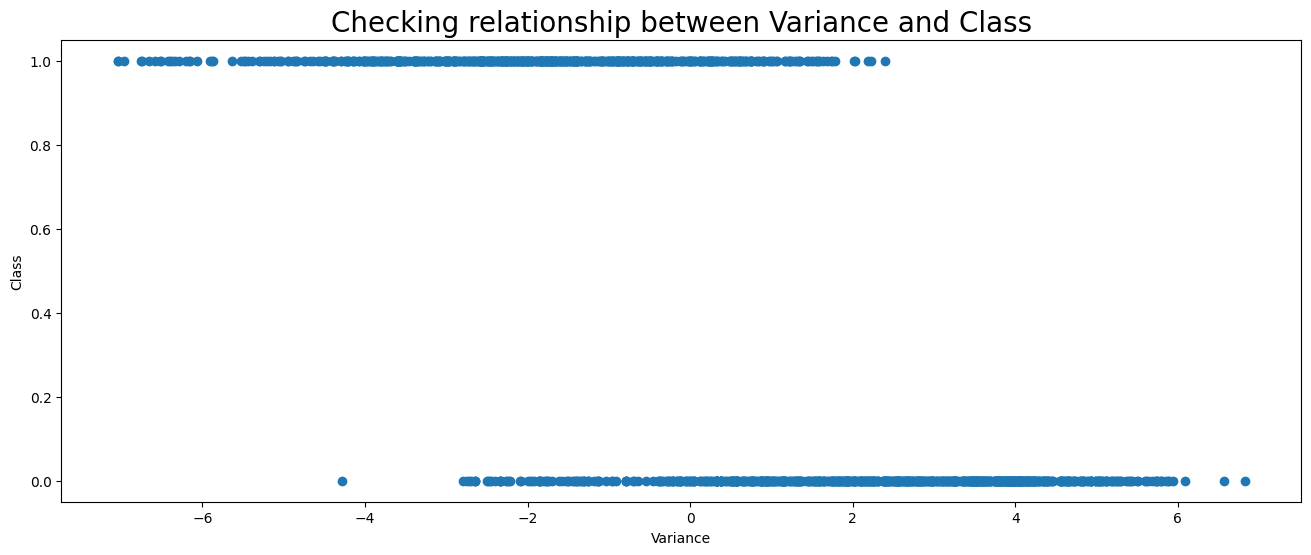

In [11]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between Variance and Class',fontsize=20)
plt.xlabel('Variance')
plt.ylabel('Class')
plt.scatter(x=df['variance'],y=df['class'])
plt.show()

In [12]:
#removing value having variance less than -3 and class 0
#
rows_to_drop=df.loc[(df['variance'] < -3) & (df['class']==0)].index

In [13]:
rows_to_drop

Index([349], dtype='int64')

In [14]:
df.drop(rows_to_drop,inplace=True)

In [15]:
#removing rows where variance is greater than 2 and class is 1
rows_to_drop=df.loc[(df['variance'] > 2 ) & (df['class']==1)].index

In [16]:
rows_to_drop

Index([911, 918, 1094, 1101, 1345], dtype='int64')

In [17]:
df.drop(rows_to_drop,inplace=True)

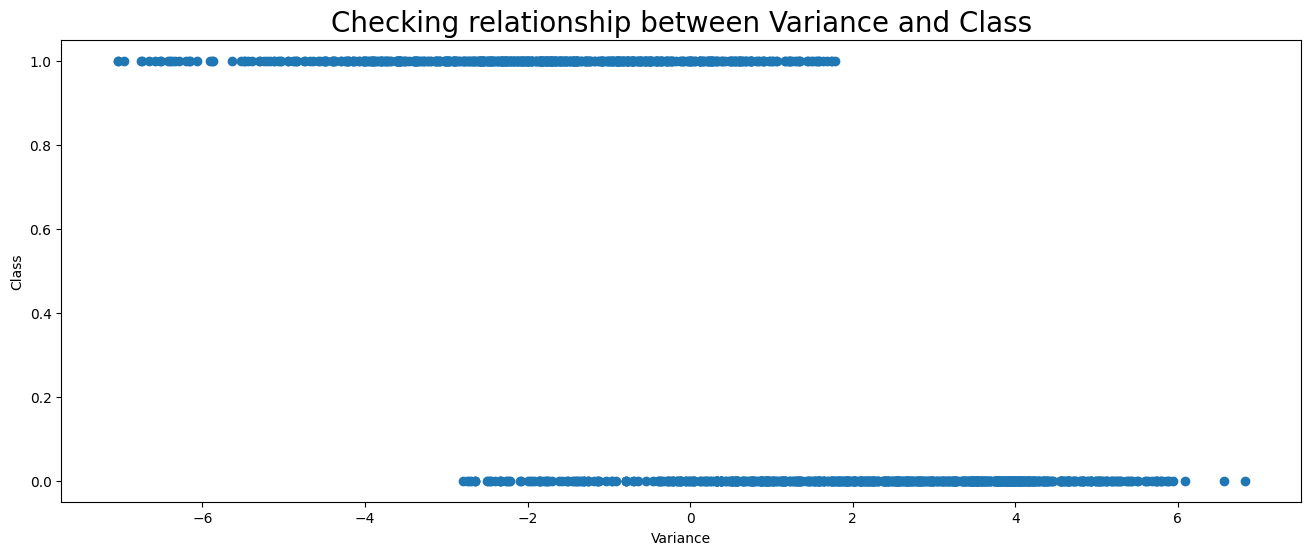

In [18]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between Variance and Class',fontsize=20)
plt.xlabel('Variance')
plt.ylabel('Class')
plt.scatter(x=df['variance'],y=df['class'])
plt.show()

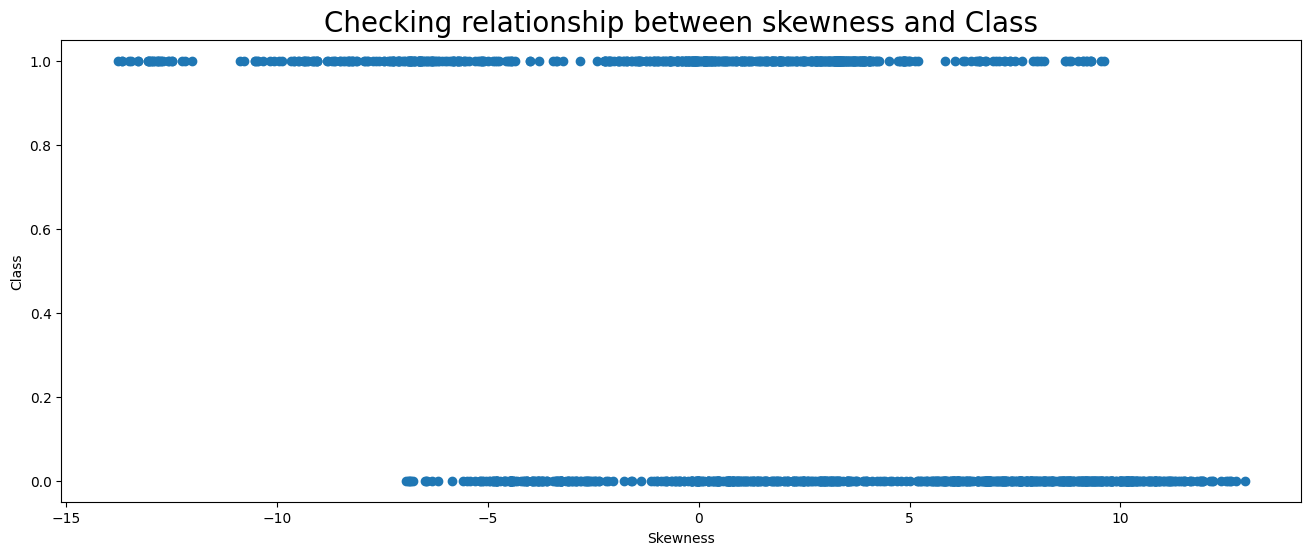

In [19]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between skewness and Class',fontsize=20)
plt.xlabel('Skewness')
plt.ylabel('Class')
plt.scatter(x=df['skewness'],y=df['class'])
plt.show()

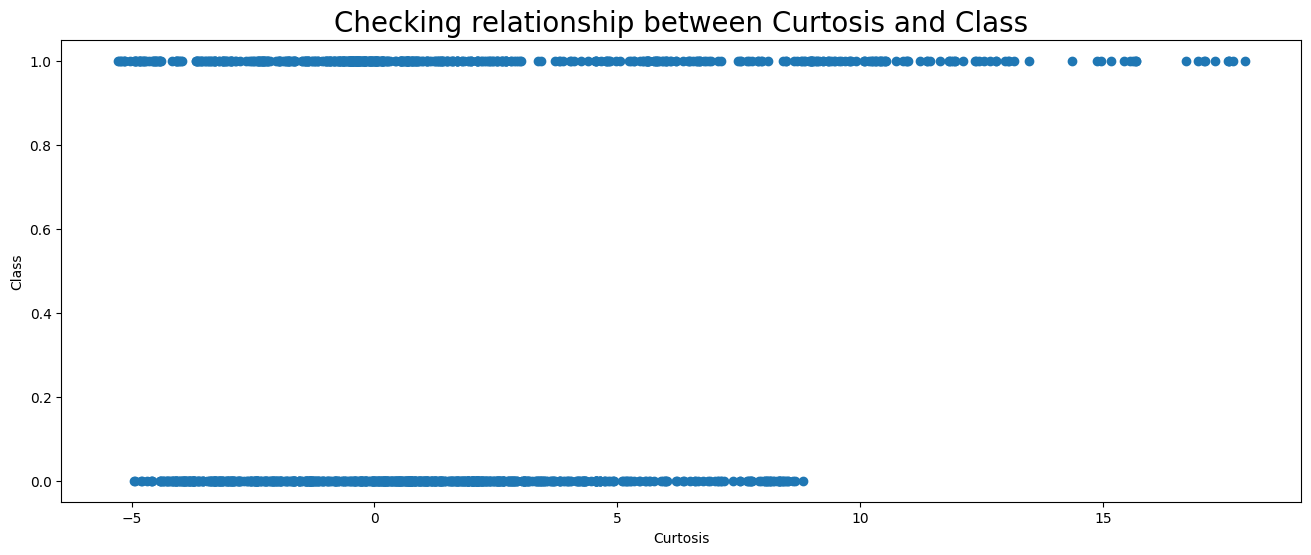

In [20]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between Curtosis and Class',fontsize=20)
plt.xlabel('Curtosis')
plt.ylabel('Class')
plt.scatter(x=df['curtosis'],y=df['class'])
plt.show()

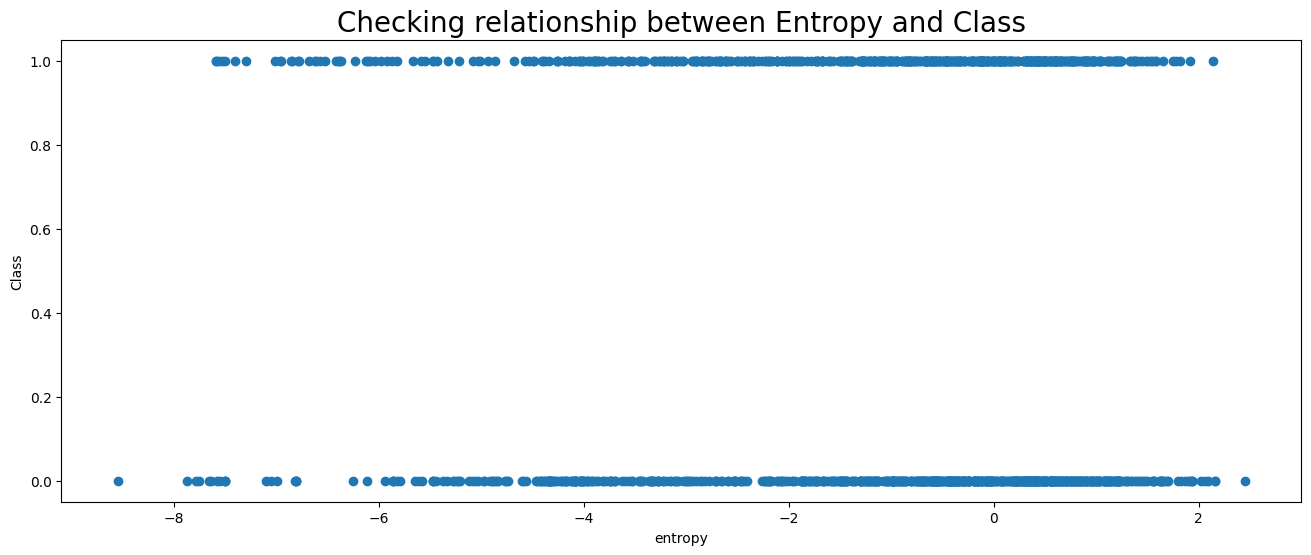

In [21]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between Entropy and Class',fontsize=20)
plt.xlabel('entropy')
plt.ylabel('Class')
plt.scatter(x=df['entropy'],y=df['class'])
plt.show()

In [28]:
#Features
X=df.drop(['class'],axis=1)
#Label/Target
y=df['class']


#spliting data for model development and its evaluation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
## Prediction
y_pred=classifier.predict(X_test)

In [31]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [32]:
score

0.9926829268292683

In [33]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("bank.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

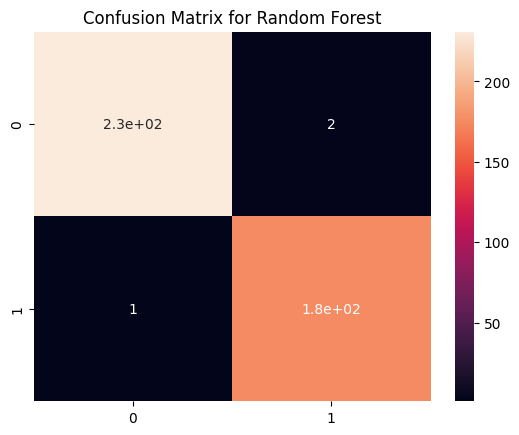

In [38]:
plt.title("Confusion Matrix for Random Forest")
RF_matx=confusion_matrix(y_test,y_pred)
sns.heatmap(RF_matx,annot=True)
plt.show()